In [1]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [7]:
# Define the instruments to download. We would like to see Apple, Microsoft and the S&P500 index.
tickers = ['RERGX', 'VIIIX', 'ABEMX', 'VSCPX', 'VMCPX']

# We would like all available data in date range.
start_date = '2018-01-01'
end_date = '2018-10-31'

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
panel_data = data.DataReader(tickers, 'yahoo', start_date, end_date)

In [8]:
# Getting just the adjusted closing prices. This will return a Pandas DataFrame
# The index in this DataFrame is the major index of the panel_data.
close = panel_data['Close']

# Getting all weekdays between date range
all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')

# How do we align the existing prices in adj_close with our new set of dates?
# All we need to do is reindex close using all_weekdays as the new index
close = close.reindex(all_weekdays)

# Reindexing will insert missing values (NaN) for the dates that were not present
# in the original set. To cope with this, we can fill the missing by replacing them
# with the latest available price for each instrument.
close = close.fillna(method='ffill')

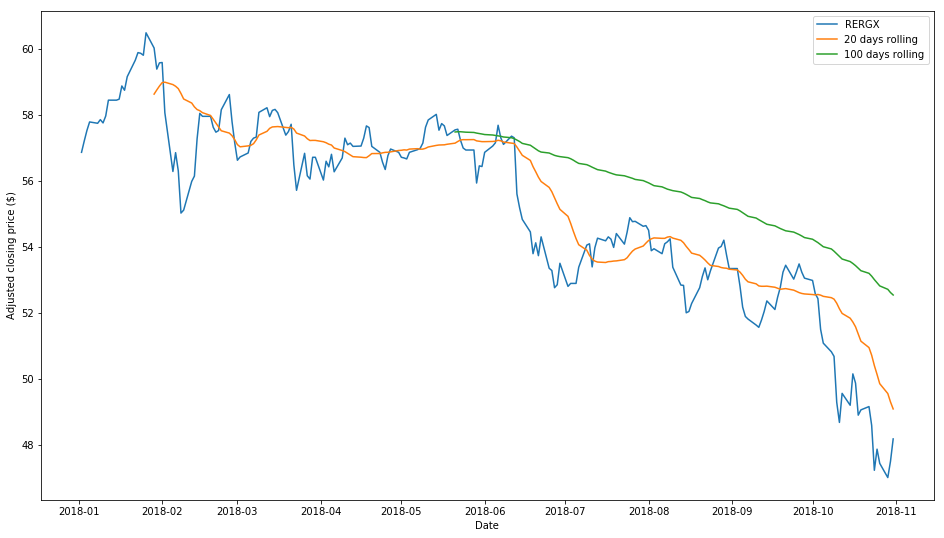

In [10]:
# Get the RERGX timeseries. This now returns a Pandas Series object indexed by date.
rergx = close.loc[:, 'RERGX']

# Calculate the 20 and 100 days moving averages of the closing prices
short_rolling_rergx = rergx.rolling(window=20).mean()
long_rolling_rergx = rergx.rolling(window=100).mean()

# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(rergx.index, rergx, label='RERGX')
ax.plot(short_rolling_rergx.index, short_rolling_rergx, label='20 days rolling')
ax.plot(long_rolling_rergx.index, long_rolling_rergx, label='100 days rolling')

ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()

In [11]:
close.to_pickle('data.pkl')

In [12]:
sns.set(style='dark', context='talk', palette='Dark2')

data = pd.read_pickle('./data.pkl')
data.head(10)

Symbols,ABEMX,RERGX,VIIIX,VMCPX,VSCPX
2018-01-01,NaN,NaN,NaN,NaN,NaN
2018-01-02,16.379999,56.869999,245.509995,210.169998,206.000000
2018-01-03,16.430000,57.209999,247.080002,211.419998,206.570007
2018-01-04,16.549999,57.529999,248.119995,212.080002,206.809998
2018-01-05,16.690001,57.790001,249.869995,213.199997,207.559998
2018-01-08,16.719999,57.750000,250.289993,214.070007,208.149994
2018-01-09,16.709999,57.860001,250.690002,213.899994,207.910004
2018-01-10,16.600000,57.759998,250.410004,213.250000,207.460007
2018-01-11,16.660000,57.970001,252.190002,215.460007,210.490005
2018-01-12,16.809999,58.450001,253.899994,216.649994,211.119995


In [13]:
# Calculating the short-window moving average
short_rolling = data.rolling(window=20).mean()
short_rolling.head()

Symbols,ABEMX,RERGX,VIIIX,VMCPX,VSCPX
2018-01-01,NaN,NaN,NaN,NaN,NaN
2018-01-02,NaN,NaN,NaN,NaN,NaN
2018-01-03,NaN,NaN,NaN,NaN,NaN
2018-01-04,NaN,NaN,NaN,NaN,NaN
2018-01-05,NaN,NaN,NaN,NaN,NaN


In [14]:
# Calculating the long-window moving average
long_rolling = data.rolling(window=100).mean()
long_rolling.tail()

Symbols,ABEMX,RERGX,VIIIX,VMCPX,VSCPX
2018-10-25,14.2518,52.9214,257.9287,217.640401,220.5435
2018-10-26,14.2299,52.8248,257.8110,217.438801,220.3246
2018-10-29,14.2054,52.7214,257.6747,217.230500,220.0928
2018-10-30,14.1826,52.6234,257.5719,217.051800,219.8885
2018-10-31,14.1638,52.5492,257.5058,216.905700,219.7093


In [15]:
# Relative returns
returns = data.pct_change(1)
returns.head()

Symbols,ABEMX,RERGX,VIIIX,VMCPX,VSCPX
2018-01-01,NaN,NaN,NaN,NaN,NaN
2018-01-02,NaN,NaN,NaN,NaN,NaN
2018-01-03,0.003053,0.005979,0.006395,0.005948,0.002767
2018-01-04,0.007304,0.005593,0.004209,0.003122,0.001162
2018-01-05,0.008459,0.004519,0.007053,0.005281,0.003627


In [16]:
# Log returns - First the logarithm of the prices is taken and the the difference of consecutive (log) observations
log_returns = np.log(data).diff()
log_returns.head()

Symbols,ABEMX,RERGX,VIIIX,VMCPX,VSCPX
2018-01-01,NaN,NaN,NaN,NaN,NaN
2018-01-02,NaN,NaN,NaN,NaN,NaN
2018-01-03,0.003048,0.005961,0.006375,0.005930,0.002763
2018-01-04,0.007277,0.005578,0.004200,0.003117,0.001161
2018-01-05,0.008424,0.004509,0.007028,0.005267,0.003620


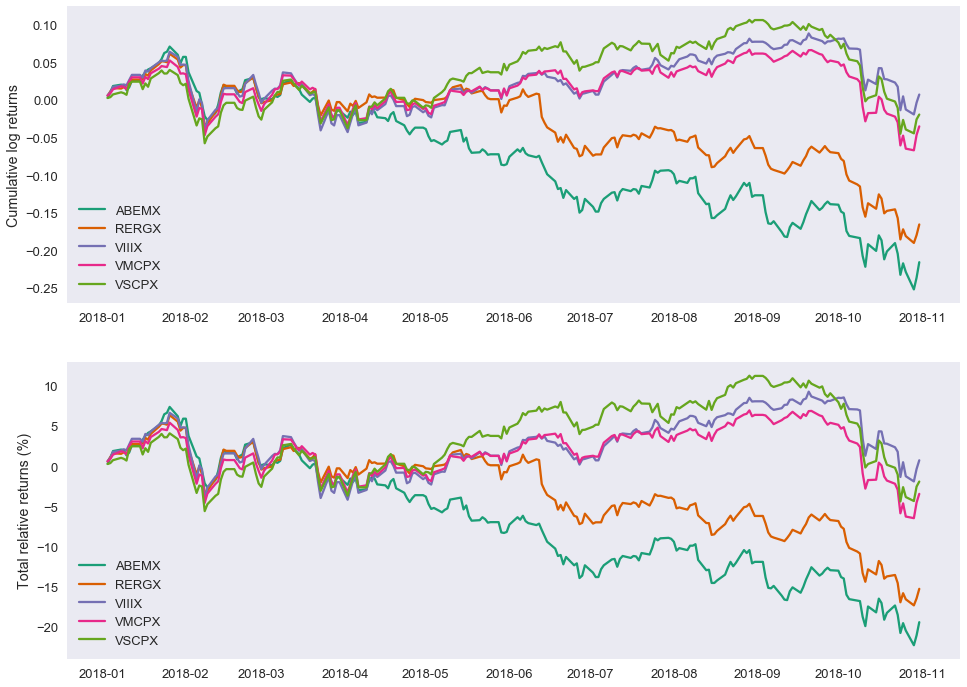

In [18]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,12))

for c in log_returns:
    ax1.plot(log_returns.index, log_returns[c].cumsum(), label=str(c))

ax1.set_ylabel('Cumulative log returns')
ax1.legend(loc='best')

for c in log_returns:
    ax2.plot(log_returns.index, 100*(np.exp(log_returns[c].cumsum()) - 1), label=str(c))

ax2.set_ylabel('Total relative returns (%)')
ax2.legend(loc='best')

plt.show()

In [19]:
# Last day returns. Make this a column vector
r_t = log_returns.tail(1).transpose()
r_t

,2018-10-31 00:00:00
Symbols,
ABEMX,0.020667
RERGX,0.014211
VIIIX,0.010813
VMCPX,0.011348
VSCPX,0.006404


In [20]:
# Weights as defined above
weights_vector = pd.DataFrame(1 / 3, index=r_t.index, columns=r_t.columns)
weights_vector

,2018-10-31 00:00:00
Symbols,
ABEMX,0.333333
RERGX,0.333333
VIIIX,0.333333
VMCPX,0.333333
VSCPX,0.333333


In [31]:
# Total log_return for the portfolio is:
portfolio_log_return = weights_vector.transpose().dot(r_t)
portfolio_log_return

,2018-10-31 00:00:00
2018-10-31,0.021929


In [32]:
weights_matrix = pd.DataFrame(1 / 3, index=data.index, columns=data.columns)
weights_matrix.tail()

Symbols,AAPL,MSFT,^GSPC
2018-10-25,0.333333,0.333333,0.333333
2018-10-26,0.333333,0.333333,0.333333
2018-10-29,0.333333,0.333333,0.333333
2018-10-30,0.333333,0.333333,0.333333
2018-10-31,0.333333,0.333333,0.333333


In [33]:
log_returns.head()

Symbols,AAPL,MSFT,^GSPC
2018-01-01,NaN,NaN,NaN
2018-01-02,NaN,NaN,NaN
2018-01-03,-0.000174,0.004643,0.006378
2018-01-04,0.004634,0.008763,0.004021
2018-01-05,0.011321,0.012322,0.007009


In [34]:
# Initially the two matrices are multiplied. Note that we are only interested in the diagonal, 
# which is where the dates in the row-index and the column-index match.
temp_var = weights_matrix.dot(log_returns.transpose())
temp_var.head().iloc[:, 0:5]

,2018-01-01 00:00:00,2018-01-02 00:00:00,2018-01-03 00:00:00,2018-01-04 00:00:00,2018-01-05 00:00:00
2018-01-01,NaN,NaN,0.003616,0.005806,0.010217
2018-01-02,NaN,NaN,0.003616,0.005806,0.010217
2018-01-03,NaN,NaN,0.003616,0.005806,0.010217
2018-01-04,NaN,NaN,0.003616,0.005806,0.010217
2018-01-05,NaN,NaN,0.003616,0.005806,0.010217


In [35]:
# The numpy np.diag function is used to extract the diagonal and then
# a Series is constructed using the time information from the log_returns index
portfolio_log_returns = pd.Series(np.diag(temp_var), index=log_returns.index)
portfolio_log_returns.tail()

2018-10-25    0.032305
2018-10-26   -0.015327
2018-10-29   -0.018346
2018-10-30    0.006457
2018-10-31    0.021929
Freq: B, dtype: float64

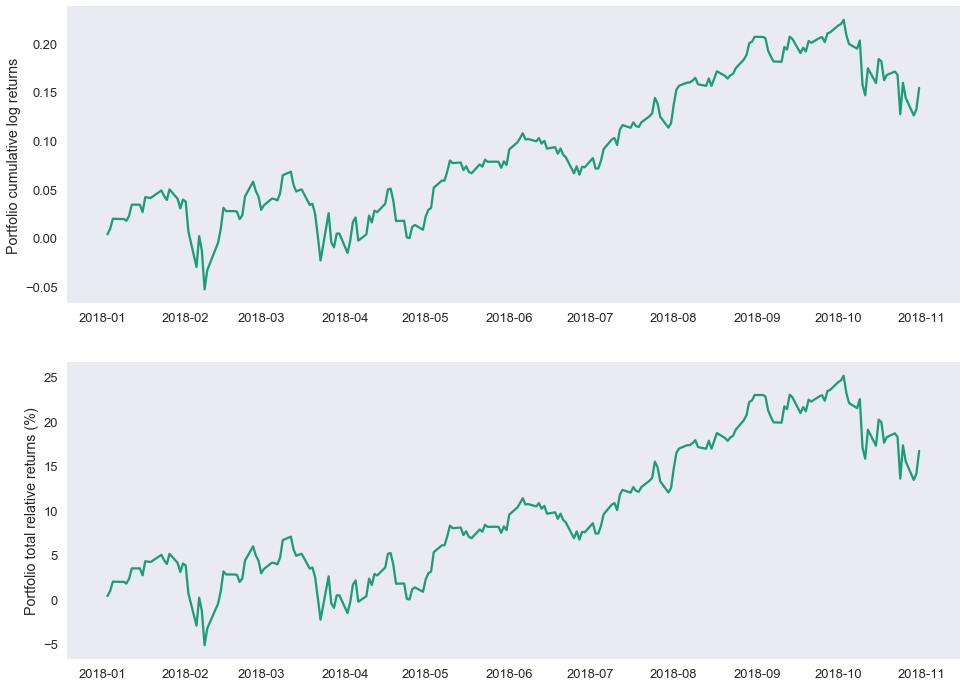

In [36]:
total_relative_returns = (np.exp(portfolio_log_returns.cumsum()) - 1)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,12))

ax1.plot(portfolio_log_returns.index, portfolio_log_returns.cumsum())
ax1.set_ylabel('Portfolio cumulative log returns')

ax2.plot(total_relative_returns.index, 100 * total_relative_returns)
ax2.set_ylabel('Portfolio total relative returns (%)')

plt.show()

In [37]:
# Calculating the time-related parameters of the simulation
days_per_year = 52 * 5
total_days_in_simulation = data.shape[0]
number_of_years = total_days_in_simulation / days_per_year

# The last data point will give us the total portfolio return
total_portfolio_return = total_relative_returns[-1]
# Average portfolio return assuming compunding of returns
average_yearly_return = (1 + total_portfolio_return)**(1 / number_of_years) - 1

print('Total portfolio return is: ' +
      '{:5.2f}'.format(100 * total_portfolio_return) + '%')
print('Average yearly return is: ' +
      '{:5.2f}'.format(100 * average_yearly_return) + '%')

Total portfolio return is: 16.67%
Average yearly return is: 20.19%
